In [1]:
import sys
sys.path.append("/home/dquintero/spatialDSSAT")
from spatialDSSAT.run import GSRun
sys.path.append("/home/dquintero/venvs/serviceDSSAT/lib/python3.10/site-packages")
sys.path.append("/home/dquintero/dssat_service/regional_service")
from dssat import run_spatial_dssat

In [45]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import os
from datetime import datetime

In [7]:
result_files = os.listdir("parameters")
df_list = []
for file in result_files:
    tmp_df = pd.read_csv(f"parameters/{file}")
    df_list.append(tmp_df)
results_df = pd.concat(df_list, ignore_index=True)

In [12]:
best_corr = results_df.loc[results_df.groupby("admin1").r.idxmax()]
best_corr

,admin1,cultivar,nitro,month,r,p,me,mae,rmse
212,Bomet,KY0013,86.757669,5,0.685625,0.089068,-0.274589,0.360645,0.360645
383,Bungoma,KY0017,115.419811,5,0.757796,0.048428,-0.510296,0.510296,0.510296
1569,Kakamega,KY0009,99.488727,3,0.841484,0.017609,-0.269145,0.358918,0.358918
1394,Kericho,IF0011,13.447555,5,0.607087,0.148279,-0.186448,0.333284,0.333284
64,Kisii,IB0067,35.390738,4,0.629695,0.129651,0.095591,0.177448,0.177448
559,Makueni,KA0001,180.759065,4,0.697040,0.081758,1.382925,1.382925,1.382925
251,Meru,KY0002,197.014149,5,0.699314,0.080341,-0.231458,0.266315,0.266315
529,Migori,IF0010,3.519711,4,0.691378,0.085343,-0.068743,0.467215,0.467215
1594,Nakuru,KY0013,197.409422,4,0.662517,0.104878,-1.211229,1.211229,1.211229
555,Nandi,IF0021,20.691968,3,0.688241,0.087363,-0.585926,0.623783,0.623783


In [40]:
# Create a normalized score for rmse and r
min_rmse = results_df.groupby("admin1").rmse.agg(lambda x: np.where(x < 0, 0, x).min())
max_rmse = results_df.groupby("admin1").rmse.agg(lambda x: np.where(x < 0, 0, x).max())
max_r = results_df.groupby("admin1").r.agg(lambda x: np.where(x < 0, 0, x).max())

results_df["rmse_norm"] = 1 - (results_df.rmse - results_df.admin1.map(min_rmse))/ \
    (results_df.admin1.map(max_rmse) - results_df.admin1.map(min_rmse))
results_df["r_norm"] = np.where(results_df.r < 0, 0, results_df.r)/results_df.admin1.map(max_r)
results_df["score"] = results_df.rmse_norm * results_df.r_norm

In [129]:
best_rmse = results_df.loc[results_df.loc[results_df.r > 0].groupby("admin1").rmse.idxmin()].set_index("admin1")
best_rmse

,cultivar,nitro,month,r,p,me,mae,rmse,rmse_norm,r_norm,score
admin1,,,,,,,,,,,
Bomet,KY0013,86.757669,5,0.685625,0.089068,-0.274589,0.360645,0.360645,1.000000,1.000000,1.000000
Bungoma,KY0011,43.587329,5,0.663545,0.104147,-0.132154,0.287965,0.287965,1.000000,0.875625,0.875625
Kakamega,KY0011,36.996884,4,0.572743,0.178971,-0.052860,0.270346,0.270346,1.000000,0.680634,0.680634
Kericho,IF0011,13.447555,5,0.607087,0.148279,-0.186448,0.333284,0.333284,1.000000,1.000000,1.000000
Kisii,KY0014,12.449597,5,0.408400,0.363021,0.006448,0.166457,0.166457,1.000000,0.648568,0.648568
Makueni,KY0002,3.227191,4,0.150747,0.746981,0.074068,0.178669,0.178669,1.000000,0.216268,0.216268
Meru,KY0014,8.555038,4,0.280549,0.542246,-0.012101,0.192325,0.192325,1.000000,0.401177,0.401177
Migori,KY0003,45.546928,4,0.529957,0.221140,0.047829,0.403219,0.403219,1.000000,0.766523,0.766523
Nakuru,KY0015,32.550484,5,0.135213,0.772548,0.029486,0.468443,0.468443,1.000000,0.204090,0.204090


In [42]:
ADMIN1_LIST = [
    'Trans Nzoia', 'Bungoma', 'Uasin Gishu', 'Nandi', 'Kakamega', 'Kisii',
    'Nakuru', 'Siaya', 'Migori', 'Narok', 'Nyamira', 'Meru', 'Kericho','Bomet',
    'Makueni'
]
DBNAME = "dssatserv"
obs = pd.read_csv("~/dssat_service/fewsnet_data/kenya_shortRains_maize.csv")
# obs = obs.loc[obs.season_name == "Long rains harvest"]
obs = obs.loc[obs.year > 2010]

In [144]:
df_list = []
for admin1 in ADMIN1_LIST:
#     pars = best_score.loc[admin1]
    pars = best_rmse.loc[admin1]
    nitro = pars.nitro/3
    for _, row in obs.loc[obs.admin_1 == admin1].iterrows():
        tmp_df = run_spatial_dssat(
            dbname=DBNAME, 
            schema="kenya", 
            admin1=admin1,
            plantingdate=datetime(row.year, pars.month, 1),
            cultivar=pars.cultivar,
            nitrogen=[(0, nitro), (30, nitro), (60, nitro)],
            all_random=True
        )
        tmp_df["admin1"] = admin1
        tmp_df["year"] = row.year
        df_list.append(tmp_df)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 18.03it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 15.06it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 17.97it/s]


In [148]:
sim_df = pd.concat(df_list, ignore_index=True)
sim_df["HARWT"] = pd.to_numeric(sim_df.HARWT)
# sim_df.to_csv("dssat_bestCultivars_nonRandom_bestScore.csv")
# sim_df.to_csv("dssat_bestCultivars_random_bestScore.csv")
# sim_df.to_csv("dssat_bestCultivars_nonRandom_bestRMSE.csv")
sim_df.to_csv("dssat_bestCultivars_random_bestRMSE.csv")

In [149]:
# sim_df.to_csv("dssat_simulated_selected_cultivars_nonRandom.csv")
sim_nonRand_bestScore = pd.read_csv("dssat_bestCultivars_nonRandom_bestScore.csv")
sim_rand_bestScore = pd.read_csv("dssat_bestCultivars_random_bestScore.csv")
sim_nonRand_bestRMSE = pd.read_csv("dssat_bestCultivars_nonRandom_bestRMSE.csv")
sim_rand_bestRMSE = pd.read_csv("dssat_bestCultivars_random_bestRMSE.csv")

In [155]:
sim_df = sim_nonRand_bestScore
def verification_plot(sim_df):
    fig, axes = plt.subplots(3, 5, figsize=(12, 6), sharey=False, gridspec_kw={"hspace":.6, "wspace":.3})
    axes = axes.flatten()

    for n, admin1 in enumerate(ADMIN1_LIST):
        ax = axes[n]
        tmp_df = sim_df.loc[sim_df.admin1 == admin1]
        tmp_df["HARWT"] = tmp_df.HARWT/1000
        tmp_df = tmp_df.sort_values(by="year")
        sns.boxplot(
            tmp_df,
            x="year",
            y="HARWT",
            ax=ax,
            zorder=0,
    #         fliersize=2,
            flierprops={"marker": "x", "markersize": 3}
        )
        sns.scatterplot(
            obs.loc[obs.admin_1 == admin1].sort_values(by="year"),
            x=ax.get_xticks(),
            y="value",
            ax=ax,
            zorder=1
        )
        ax.set_ylabel("Yield (t/ha)", fontsize=7)
        ax.set_xlabel("", fontsize=7)
        ax.set_yticklabels(ax.get_yticklabels(), fontsize=7)
        ax.set_xticklabels(ax.get_xticklabels(), fontsize=7, rotation=30)
        ax.set_title(admin1, fontsize=10)

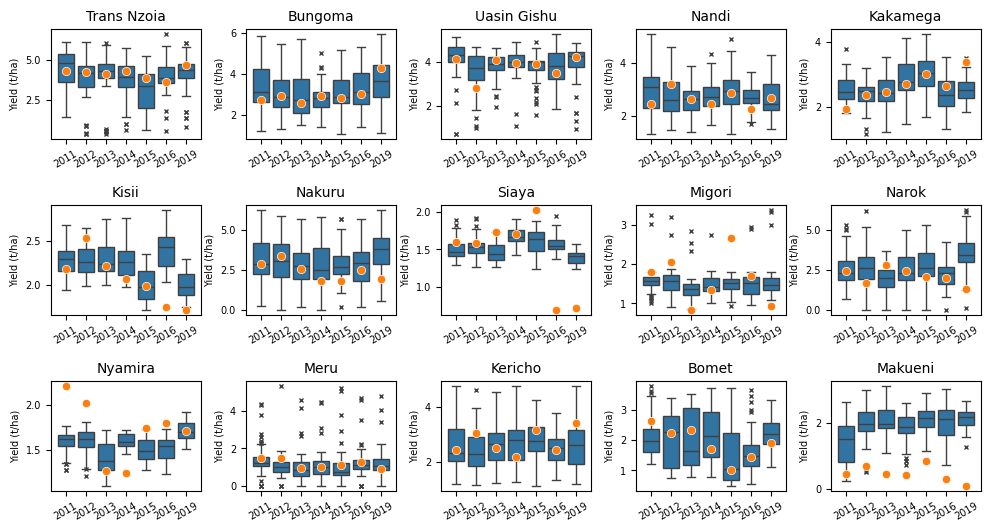

In [350]:
verification_plot(sim_rand_bestScore)

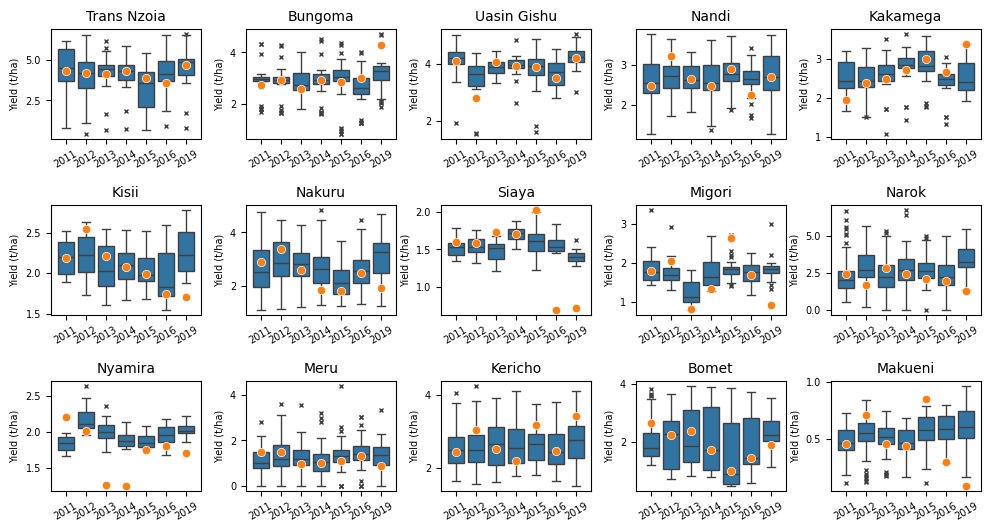

In [157]:
verification_plot(sim_nonRand_bestRMSE)

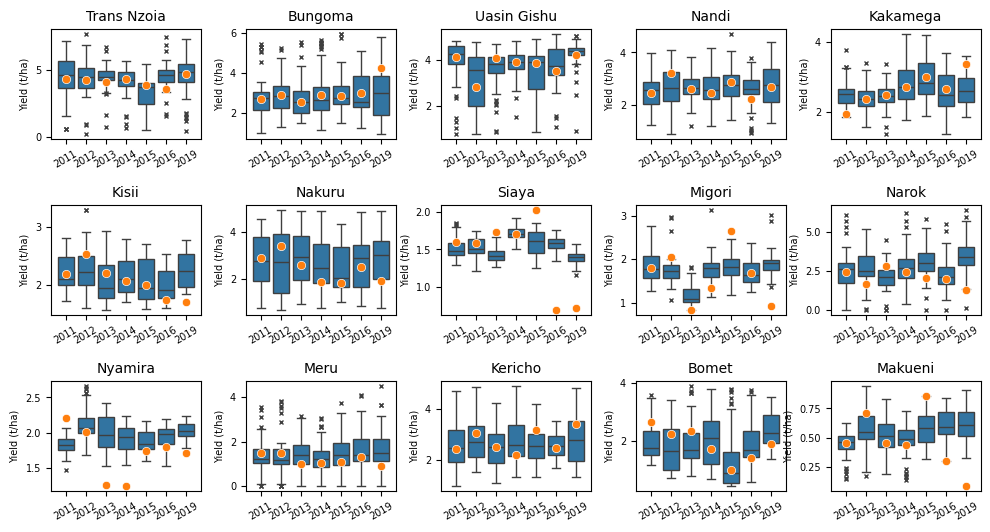

In [158]:
verification_plot(sim_rand_bestRMSE)

In [339]:
Z_LIM = .44
def get_simulated_probs(admin1):
    yld = obs.loc[obs.admin_1 == admin1].set_index("year").sort_index().value
    std_yield = (yld - yld.mean())/yld.std()
    yld_sim = sim_rand_bestRMSE.loc[sim_rand_bestRMSE.admin1 == admin1].set_index("year").sort_index().HARWT/1000
    std_yield_sim = (yld_sim - yld.mean())/yld.std()
    yld_cats_sim = pd.Series(np.where(
        std_yield_sim < -Z_LIM, 0,
        np.where(std_yield_sim > Z_LIM, 2, 1)
    ), index=std_yield_sim.index)

    yld_cats_sim = yld_cats_sim.reset_index().rename(columns={0: "yld_cat"})
    yld_cats_sim["prob"] = 1/50
    yld_cats_sim = pd.pivot_table(
        yld_cats_sim,
        index="year",
        columns="yld_cat",
        values="prob",
        aggfunc="sum"
    )
    yld_cats_sim = yld_cats_sim.fillna(0)
    return yld_cats_sim

def get_obs_probs(admin1):
    yld = obs.loc[obs.admin_1 == admin1].set_index("year").sort_index().value
    std_yield = (yld - yld.mean())/yld.std()
    yld_cats = pd.Series(np.where(
        std_yield < -Z_LIM, 0,
        np.where(std_yield > Z_LIM, 2, 1)
    ), index=std_yield.index)
    yld_cats
    yld_cats = yld_cats.reset_index().rename(columns={0: "yld_cat"})
    yld_cats["prob"] = 1
    yld_cats = pd.pivot_table(
        yld_cats,
        index="year",
        columns="yld_cat",
        values="prob",
        aggfunc="sum"
    )
    yld_cats = yld_cats.fillna(0)
    return yld_cats

def calculate_RPSS(admin1):
    yld_cats = get_obs_probs(admin1)
    yld_cats_sim = get_simulated_probs(admin1)
    RPS = ((yld_cats_sim.cumsum(axis=1) - yld_cats.cumsum(axis=1))**2).sum(axis=1).mean()
    
    yld_cats_clim = yld_cats.copy()
    yld_cats_clim[0] = yld_cats_clim[2] = 0
    yld_cats_clim[1] = 1
    
    RPS_clim = ((yld_cats_clim.cumsum(axis=1) - yld_cats.cumsum(axis=1))**2).sum(axis=1).mean()
    return 1 - RPS/RPS_clim


In [342]:
df_RPSS = []
for admin1 in ADMIN1_LIST:
    df_RPSS.append((admin1, calculate_RPSS(admin1)))
pd.DataFrame(df_RPSS, columns=["admin1", "RPSS"]).round(3)

,admin1,RPSS
0,Trans Nzoia,0.026
1,Bungoma,0.203
2,Uasin Gishu,0.585
3,Nandi,0.364
4,Kakamega,0.440
5,Kisii,0.221
6,Nakuru,0.323
7,Siaya,0.290
8,Migori,0.321
9,Narok,0.043


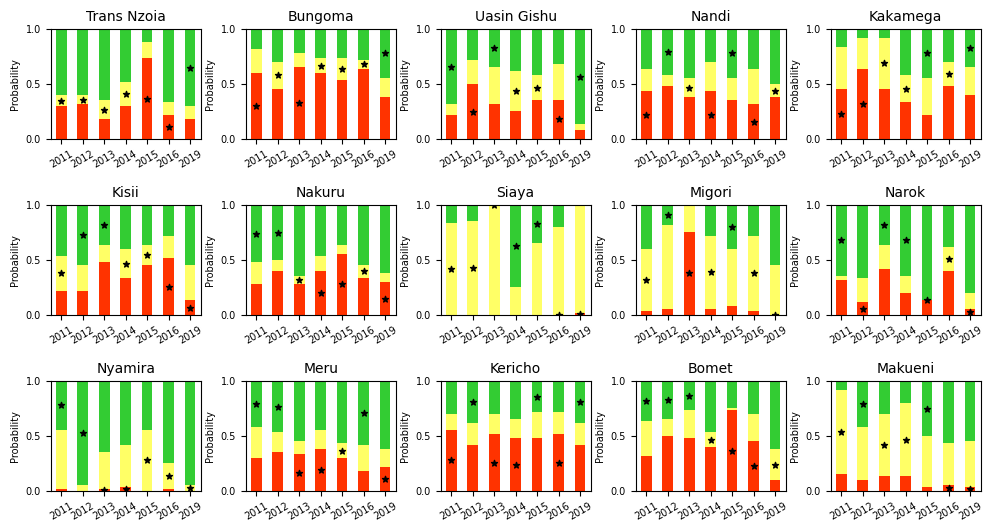

In [341]:
fig, axes = plt.subplots(3, 5, figsize=(12, 6), sharey=False, gridspec_kw={"hspace":.6, "wspace":.3})
axes = axes.flatten()
for n, admin1 in enumerate(ADMIN1_LIST[:]):
    ax = axes[n]
    yld_cats_sim = get_simulated_probs(admin1)
    yld_cats_sim.plot.bar(
        stacked=True, color={0: "#ff3300", 1: "#ffff66", 2: "#33cc33"},
        ax=ax, legend=False, zorder=1
    )
    
    yld_cats = get_obs_probs(admin1)
    yld_cats_loc = ((yld_cats_sim.cumsum(axis=1) - yld_cats_sim/2)*yld_cats).max(axis=1).reset_index()
    yld_cats_loc["ticks"] = ax.get_xticks()
    yld_cats_loc.plot.scatter(x="ticks", y=0, ax=ax, zorder=2, marker="*", color="k")
    
    ax.set_ylabel("Probability", fontsize=7)
    ax.set_xlabel("", fontsize=7)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=7)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=7, rotation=30)
    ax.set_title(admin1, fontsize=10)
    ax.set_ylim(0, 1)

0.7823988904855493

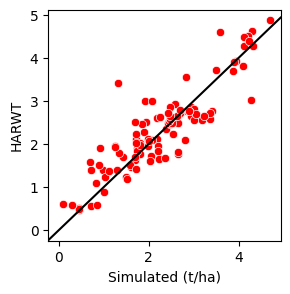

In [372]:
tmp_df = sim_rand_bestRMSE.groupby(["admin1", "year"]).HARWT.median() / 1000
tmp_df = tmp_df.reset_index().set_index(["admin1", "year"])
tmp_df["obs"] = obs.rename(columns={"admin_1": "admin1"}).set_index(["admin1", "year"]).value

fig, ax = plt.subplots(1, 1, figsize=(3, 3))
sns.scatterplot(
    tmp_df,
    x="obs",
    y="HARWT",
    ax=ax,
    color="r",
#     hue=tmp_df.index.get_level_values(0),
    legend=False
)
ax.axline((0, 0), slope=1, color="k")
ax.set_xlabel("Observed (t/ha)")
ax.set_xlabel("Simulated (t/ha)")

from sklearn.metrics import r2_score
r2_score(tmp_df.obs, tmp_df.HARWT)

In [369]:
tmp_df

HARWT       obs
admin1      year                  
Bomet       2011  1.7800  2.649390
            2012  1.6510  2.241000
            2013  1.6880  2.358000
            2014  2.1135  1.719000
            2015  0.8990  1.005514
...                  ...       ...
Uasin Gishu 2013  3.8120  4.095000
            2014  3.9365  3.933000
            2015  3.8955  3.892475
            2016  3.7310  3.510017
            2019  4.4045  4.230000

[105 rows x 2 columns]